In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

# Pendahuluan EDA

In [ ]:
# read the dataset
df = pd.read_csv("Diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Supervised or Unsupervised
# ans: Supervised->target column
# Regreesion or classification
# ans: classification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# independent feature->'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
# dependent feature-> outcome

# descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# (row, columns)
df.shape

(768, 9)

In [ ]:
# distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

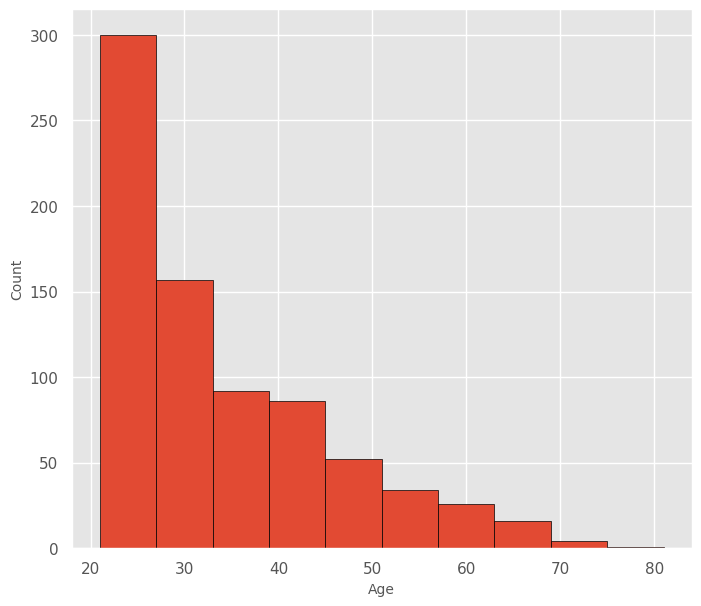

In [ ]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

<Axes: xlabel='Age', ylabel='Density'>

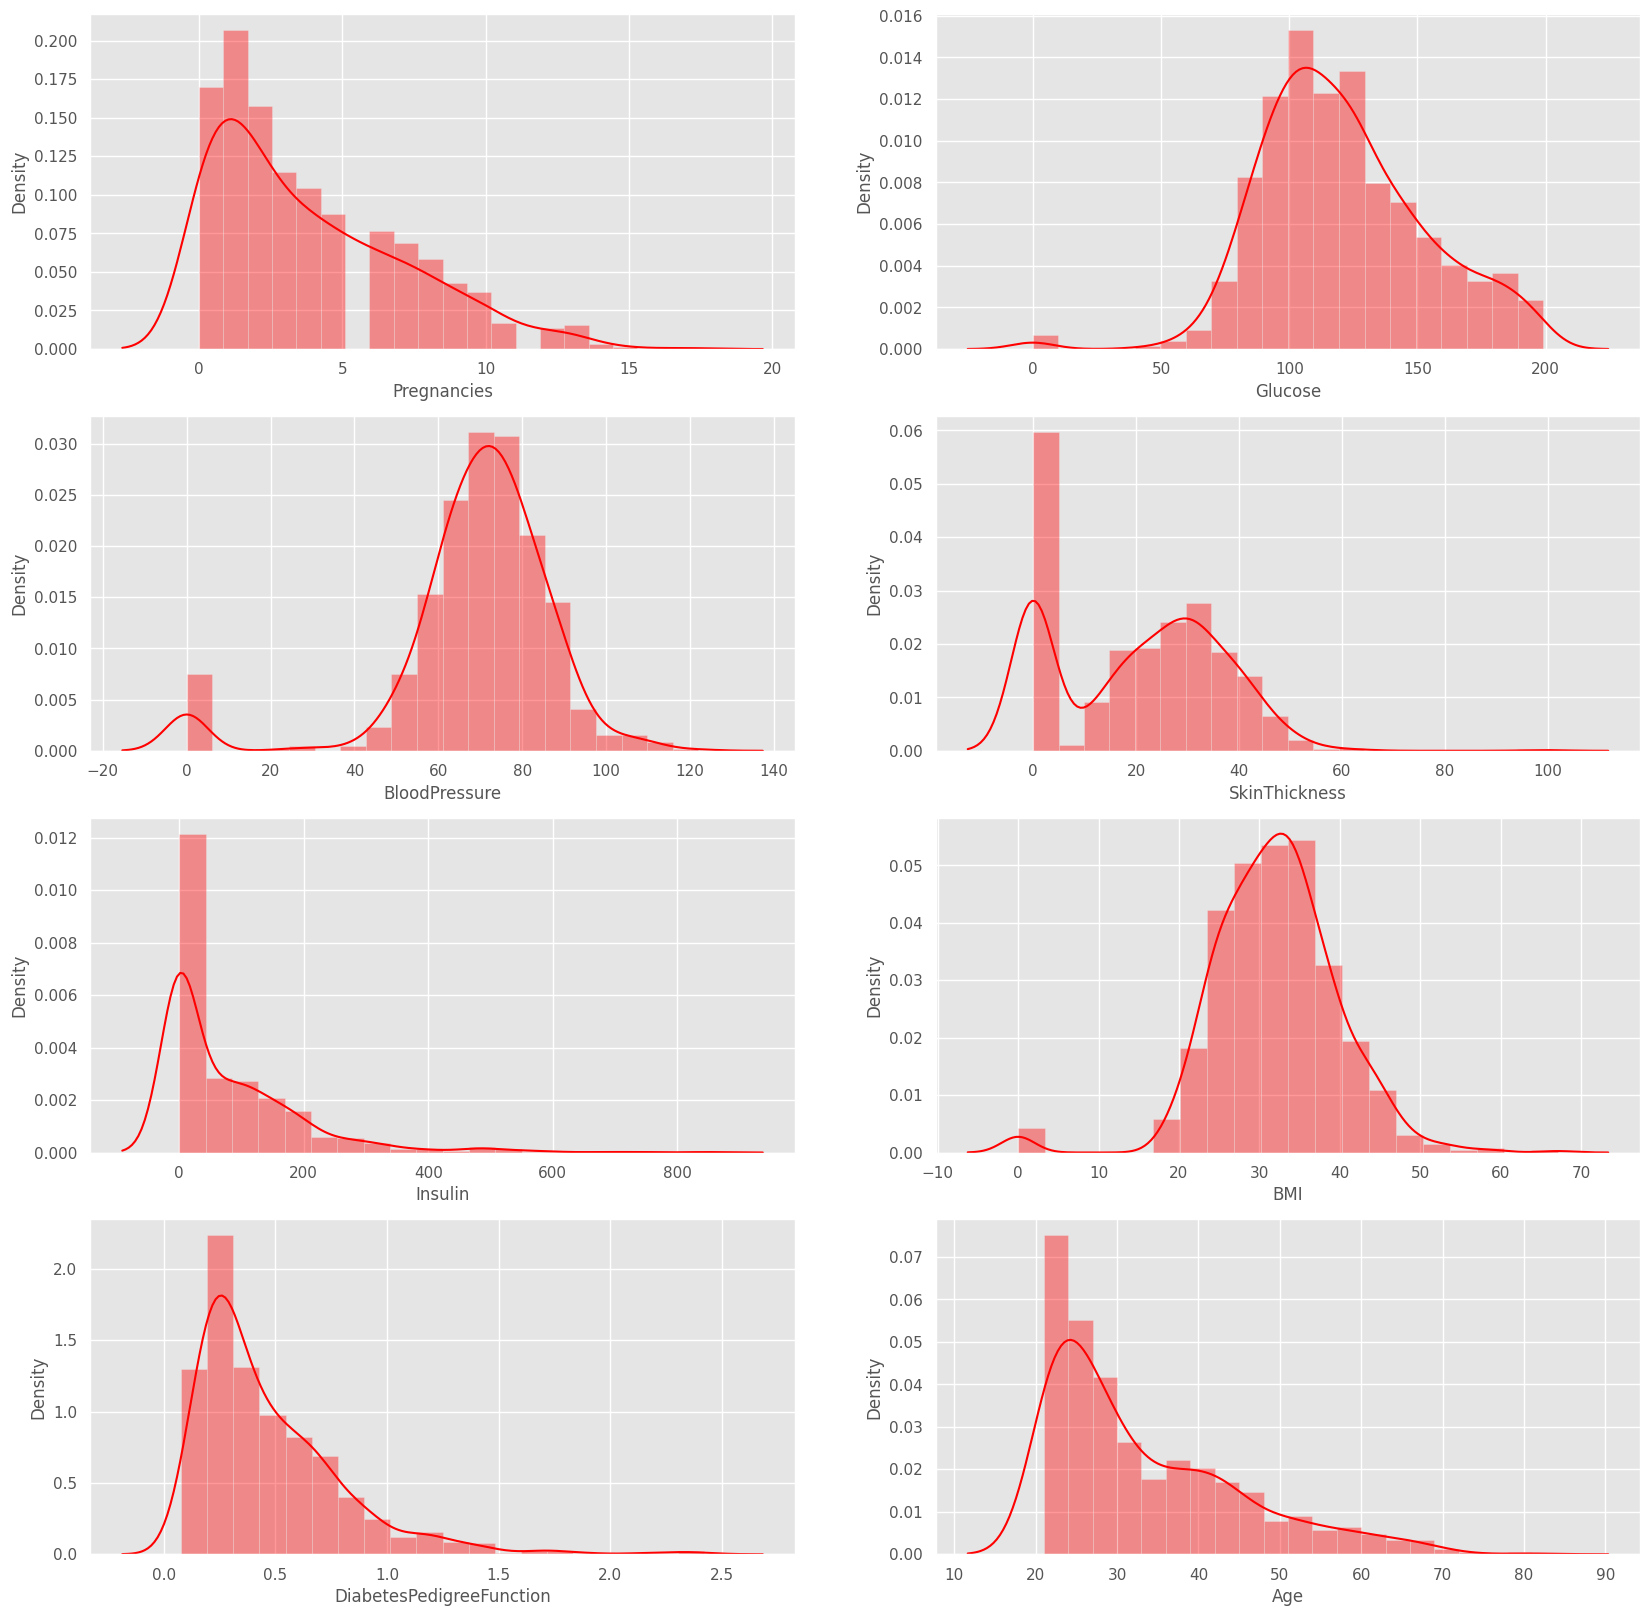

In [ ]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

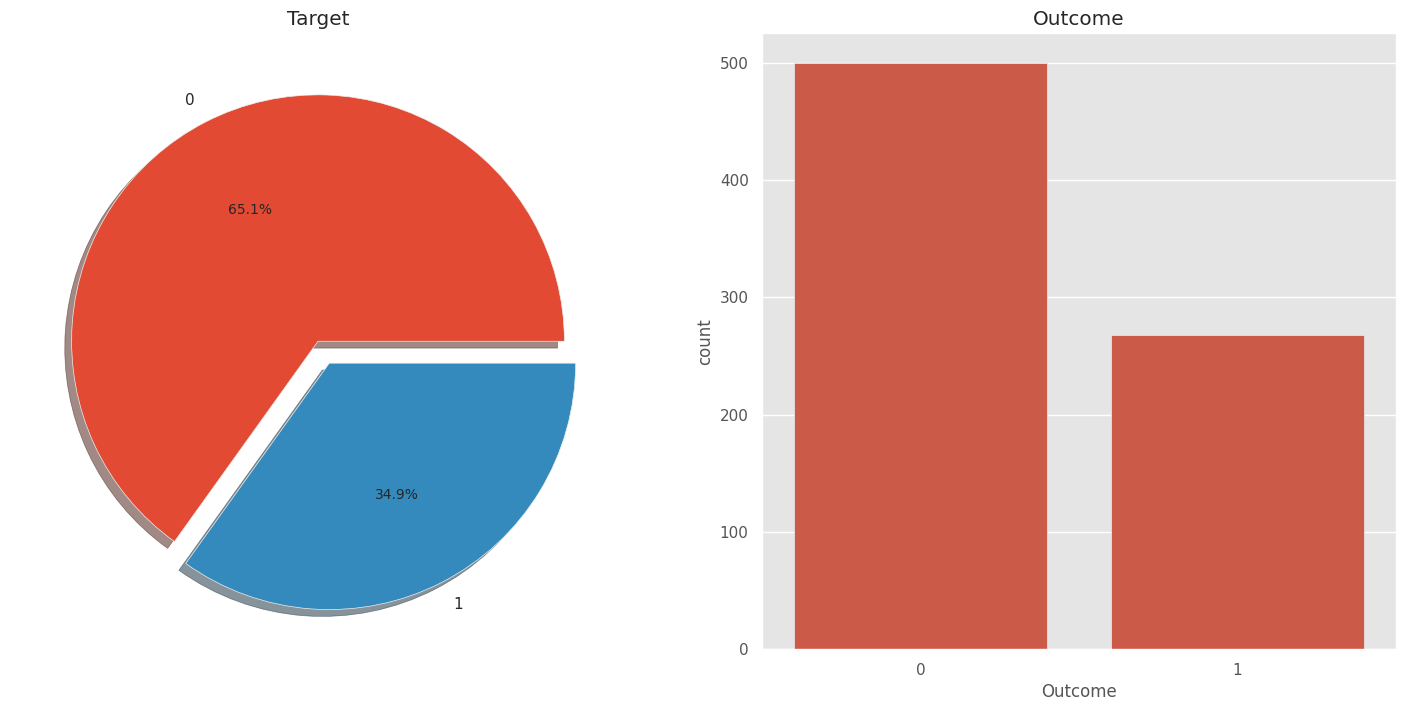

In [ ]:
# Membuat presentasi banyaknya Outcome

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plotting the pie chart
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')

# Plotting the count plot
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')

plt.show()


In [ ]:
# Korelasi
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


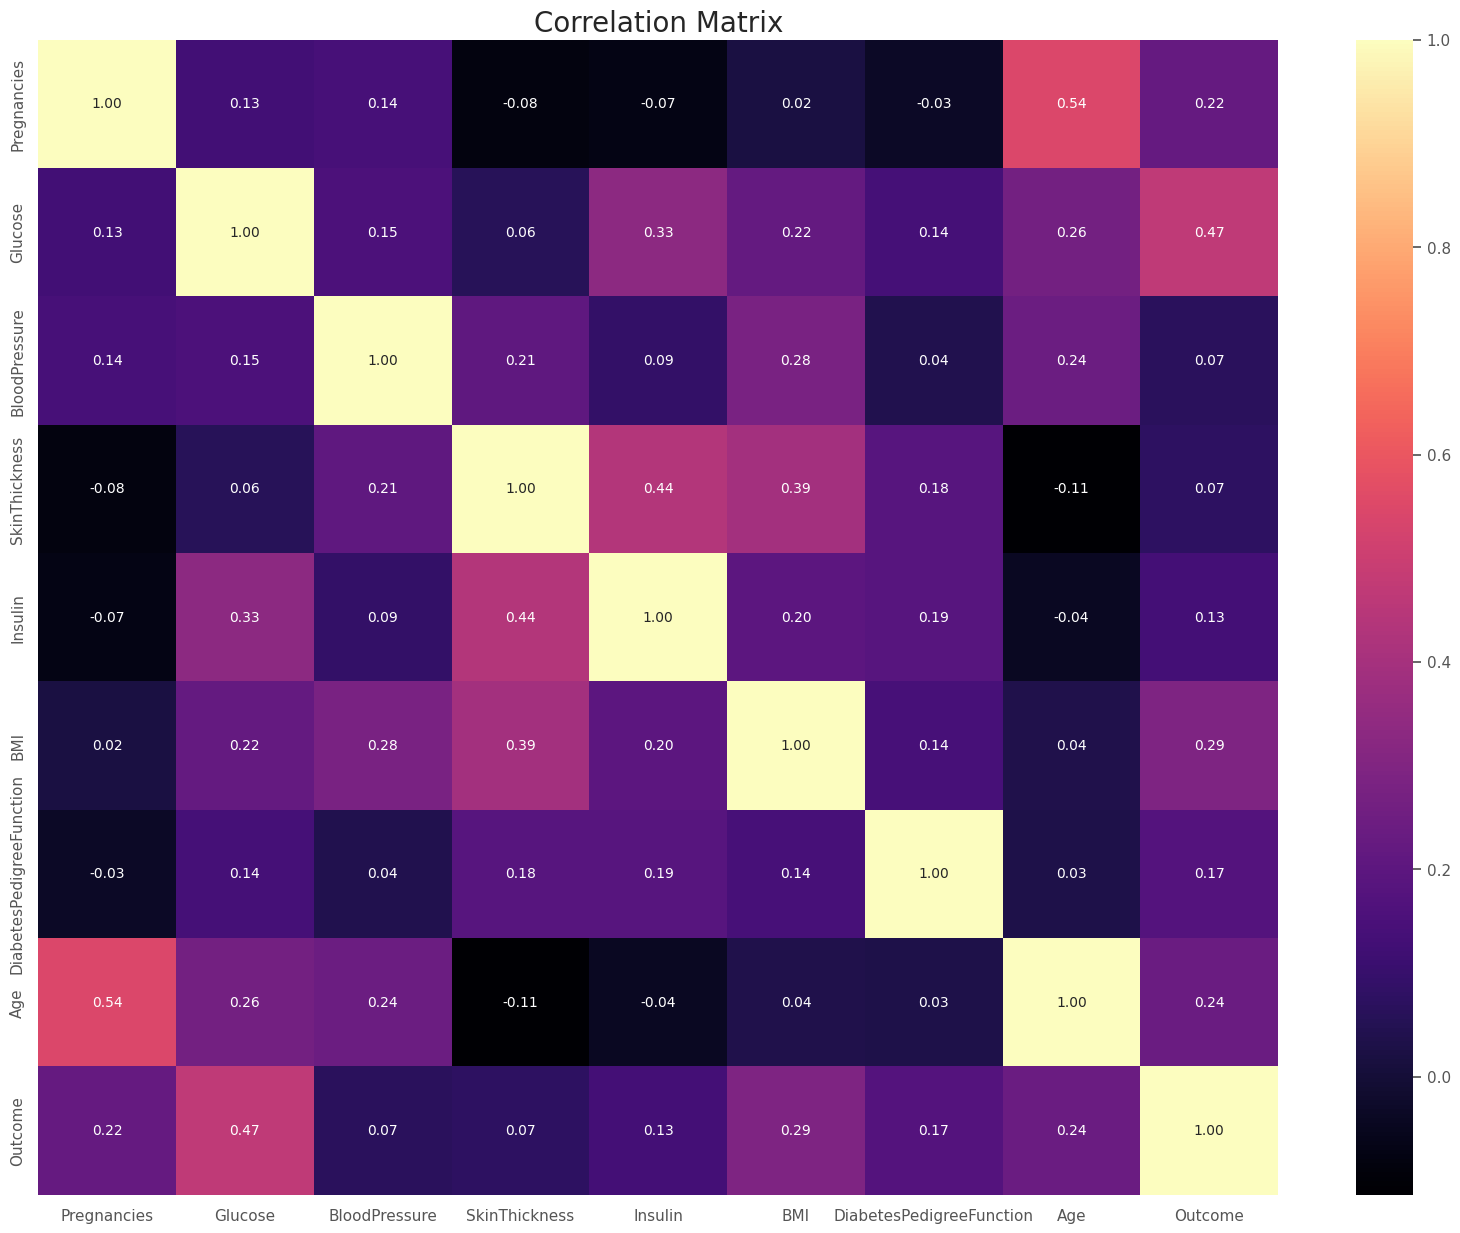

In [ ]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Preprocessing Data

In [ ]:
# Ganti Data yang kosong dengan NaN
df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [ ]:
# Data preprocessing Part
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
#median
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Data yang kosong sudah diisi dengan median
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Kode `sns.pairplot(df, hue="Outcome")` digunakan untuk membuat pair plot dari DataFrame `df`. Pair plot adalah plot yang memungkinkan kita untuk memvisualisasikan hubungan antara pasangan variabel dalam DataFrame.

Dalam pair plot, setiap sumbu akan mewakili satu variabel dalam DataFrame, dan setiap sel akan menunjukkan hubungan antara pasangan variabel tersebut. Jika DataFrame memiliki kolom yang membedakan kategori atau kelas (seperti kolom "Outcome" yang mungkin menunjukkan apakah seseorang sehat atau memiliki diabetes), parameter `hue` dapat digunakan untuk memberi warna pada titik berdasarkan kategori ini.

Dengan memberikan `hue="Outcome"`, pair plot akan menggunakan kolom "Outcome" untuk memberi warna pada titik-titik dalam plot, sehingga memungkinkan kita untuk melihat pola hubungan antara pasangan variabel dengan mempertimbangkan kelas atau kategori yang berbeda. Misalnya, kita dapat melihat bagaimana distribusi pasangan variabel berbeda untuk orang-orang yang sehat dan orang-orang yang memiliki diabetes.

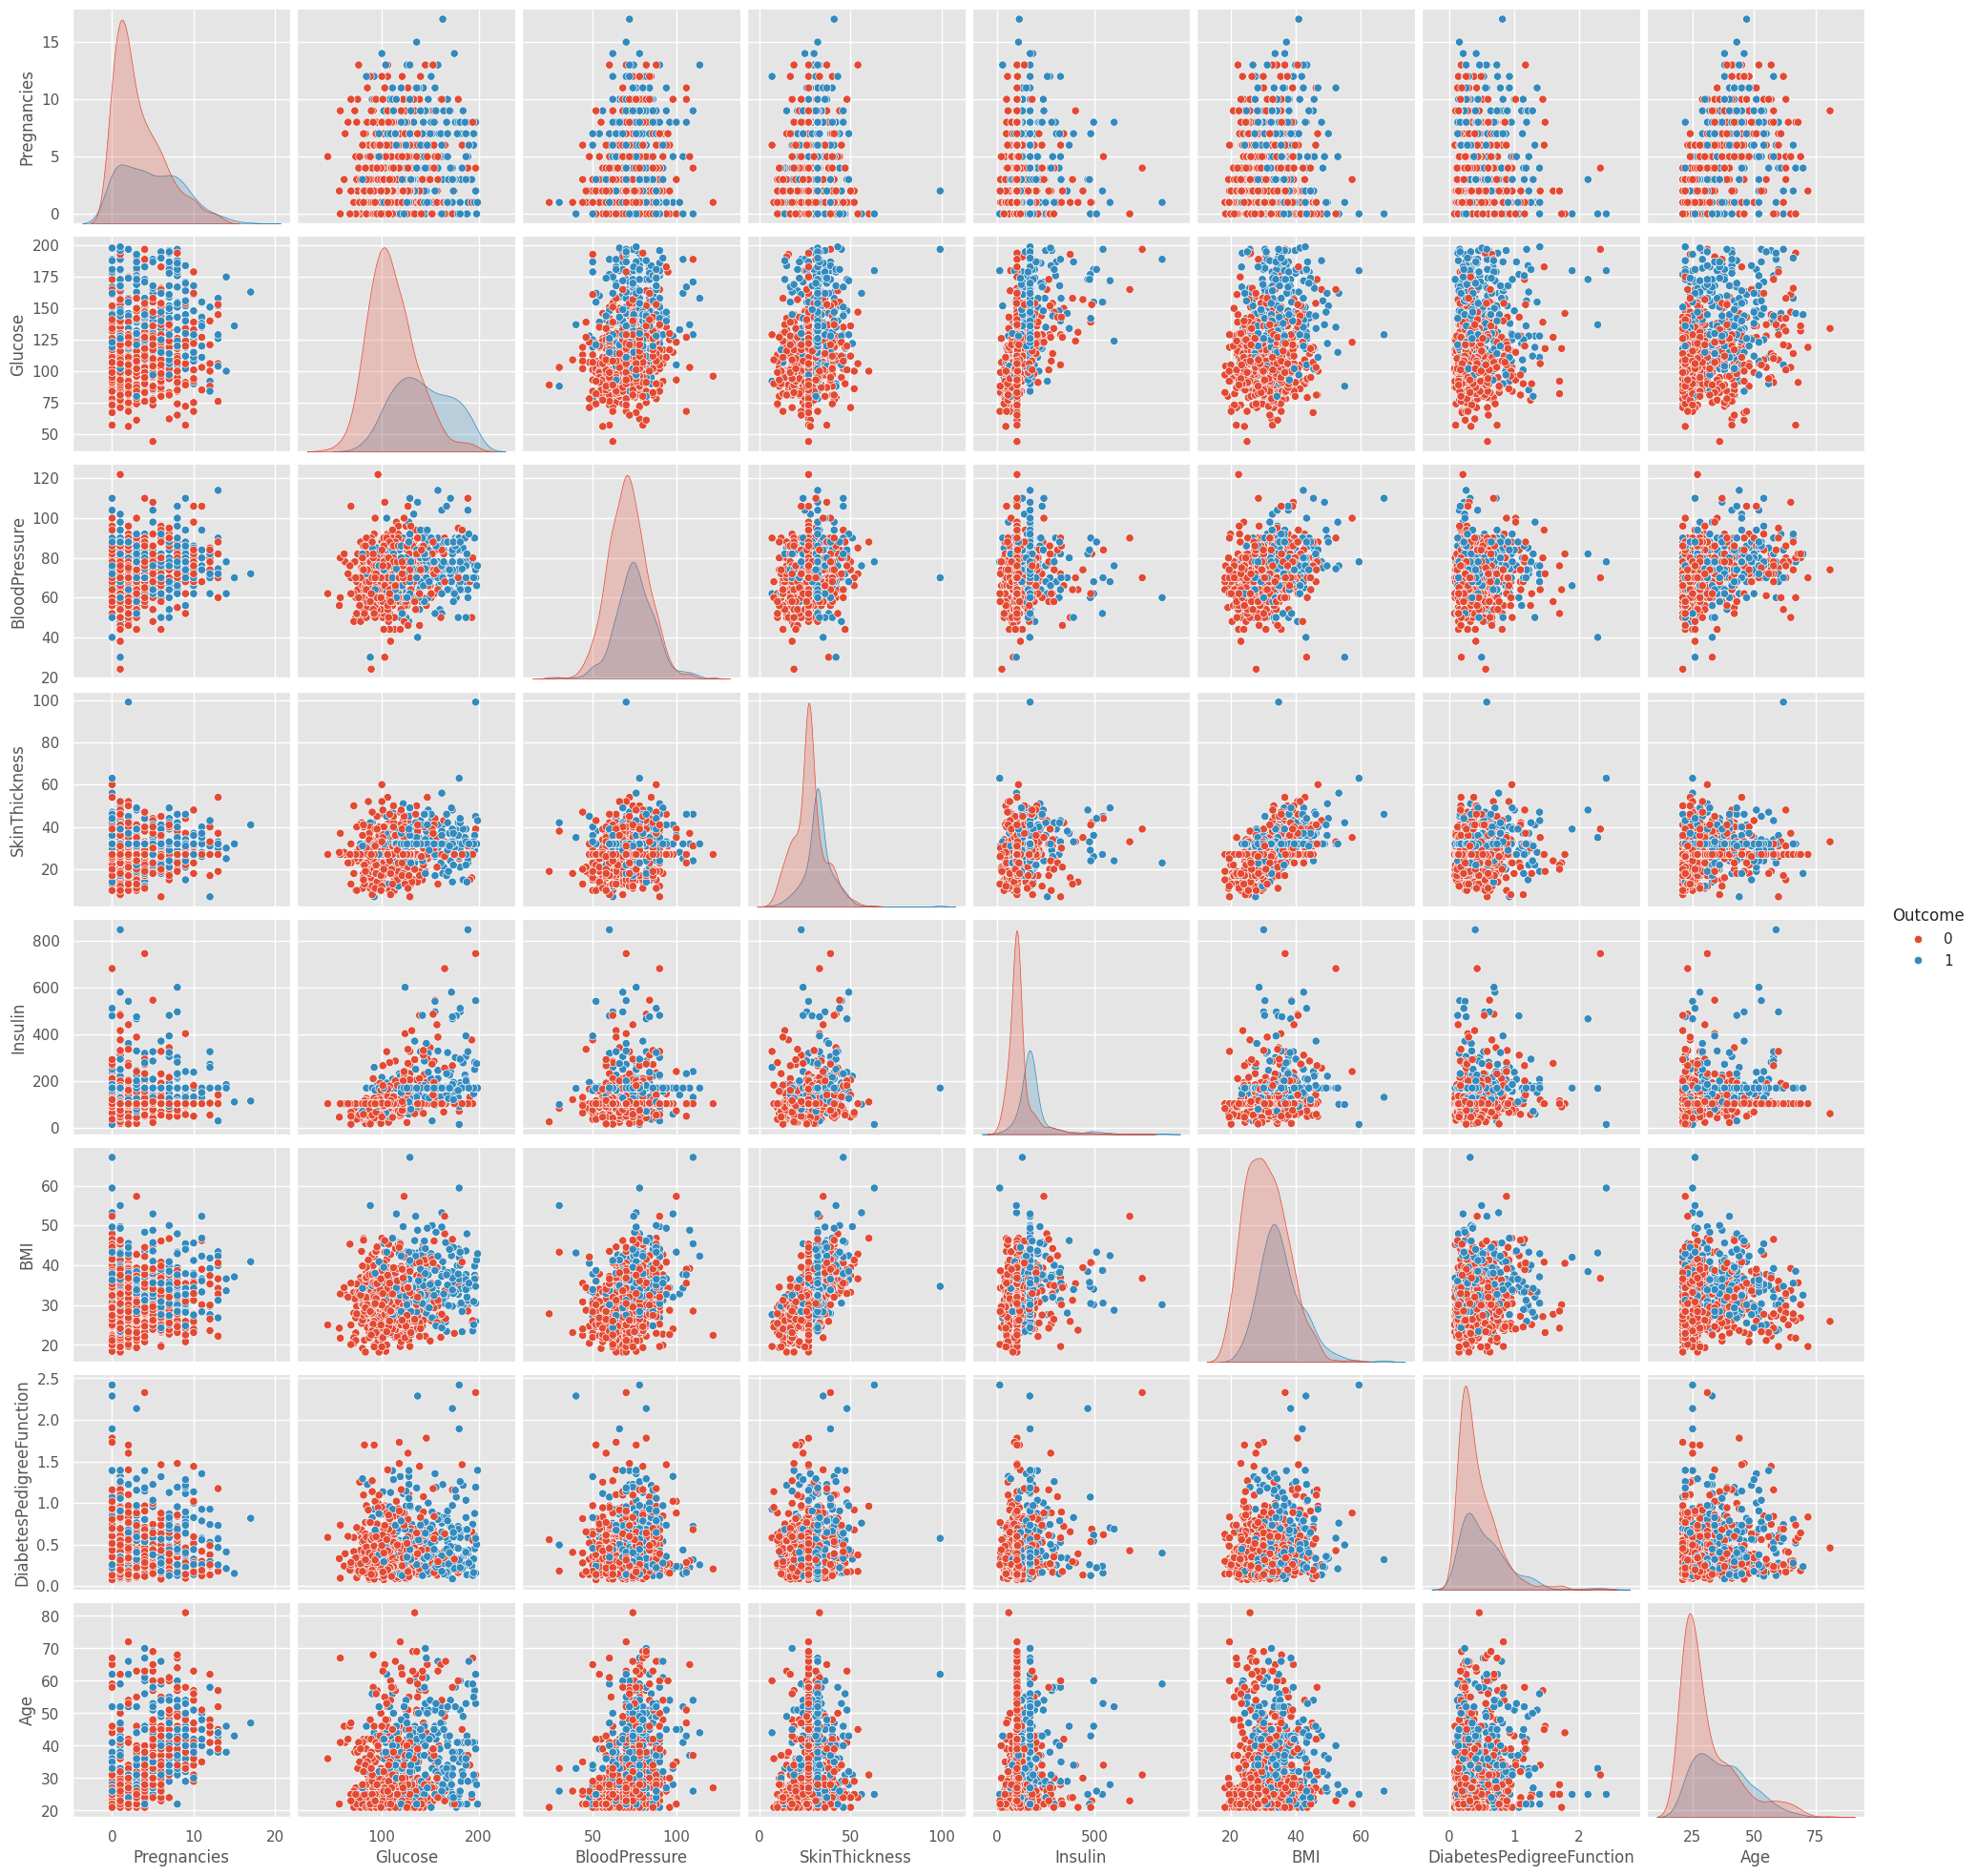

In [ ]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

In [ ]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


Ternyata ada outlier guys, jadi kita atasi outliernya pakai metode interquartile range (IQR) untuk insulin dan (LOF)

**BoxPlot Outlier tiap fitur**

<Axes: xlabel='Age'>

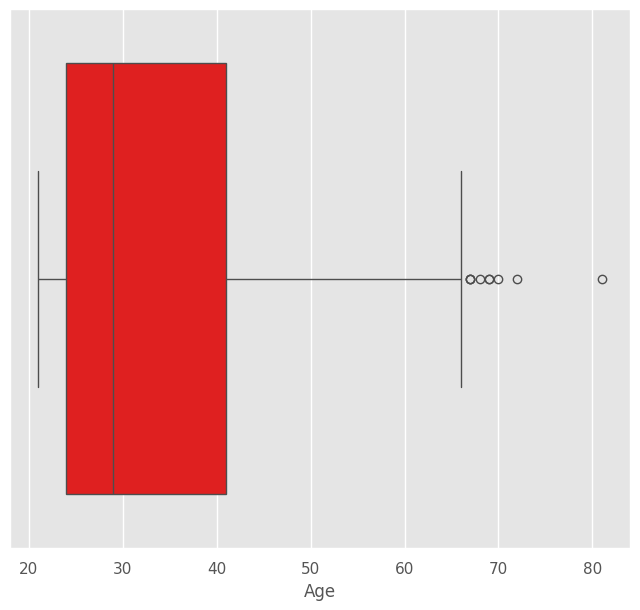

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Age"], color="red")

<Axes: xlabel='DiabetesPedigreeFunction'>

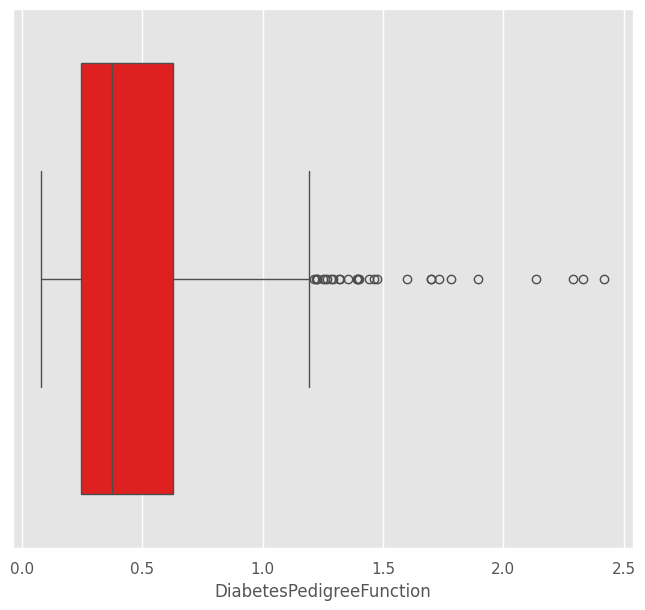

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["DiabetesPedigreeFunction"], color="red")

<Axes: xlabel='BMI'>

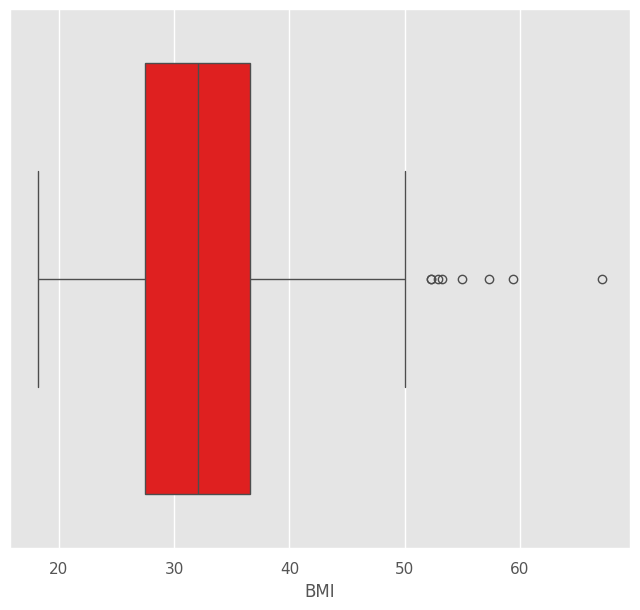

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["BMI"], color="red")

<Axes: xlabel='SkinThickness'>

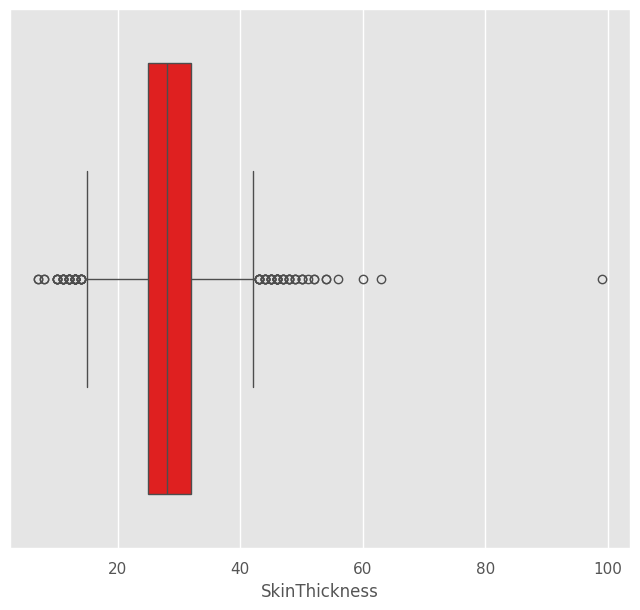

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["SkinThickness"], color="red")

<Axes: xlabel='BloodPressure'>

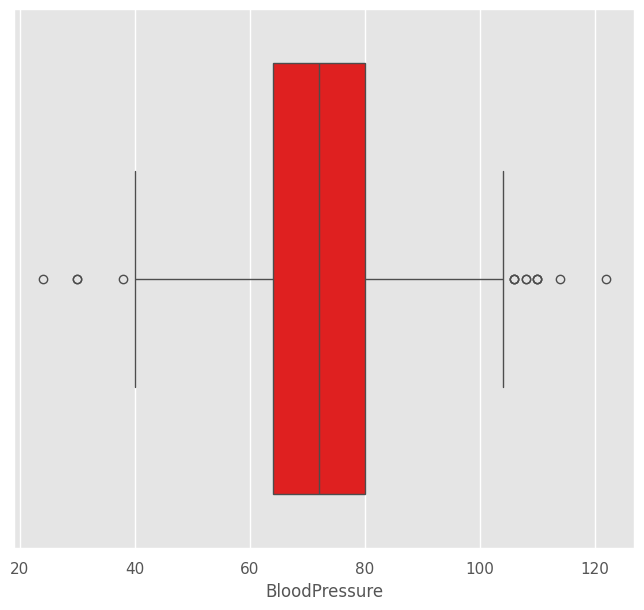

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["BloodPressure"], color="red")

<Axes: xlabel='Pregnancies'>

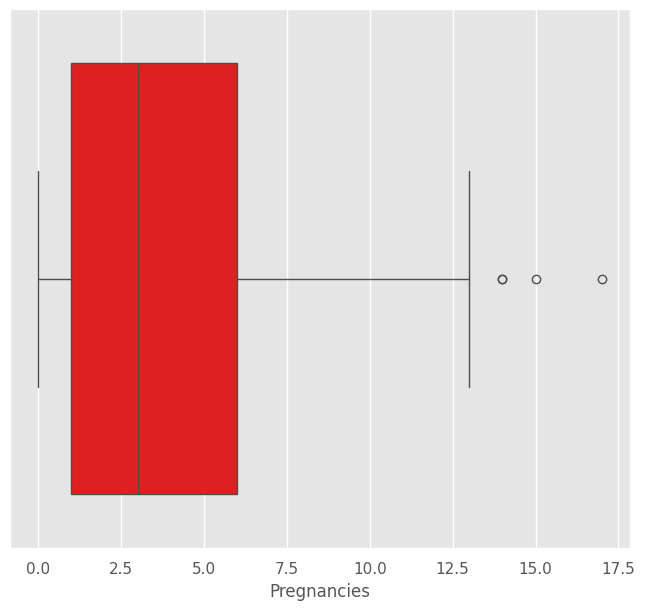

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

<Axes: xlabel='Insulin'>

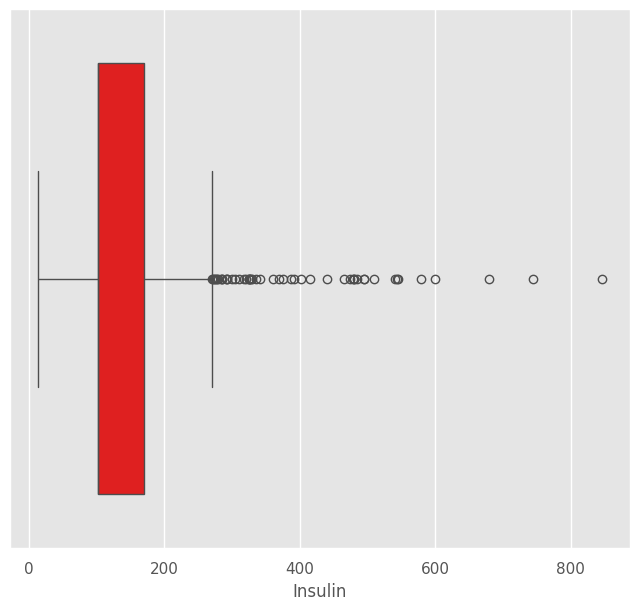

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [ ]:
# Kalau insulinnya diatasi pakai IQR (Interquartile Range)
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

Outlier pada kolom 'Insulin' **tidak dihapus**, tetapi **diubah (di-capping)**. Secara spesifik, nilai-nilai 'Insulin' yang lebih tinggi dari batas atas (upper) diatur menjadi sama dengan nilai batas atas tersebut. Ini adalah teknik yang dikenal sebagai **capping atau winsorizing**. Metode ini mempertahankan data outlier dalam dataset, **tetapi mengurangi pengaruh ekstremnya dengan menggantinya dengan nilai batas atas.**

<Axes: xlabel='Insulin'>

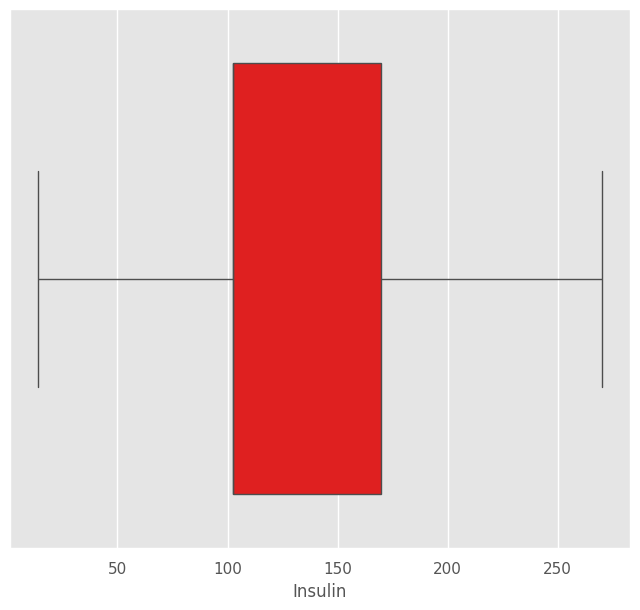

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [ ]:
df.shape

(768, 9)

In [ ]:
# Metode LOF dari sklearn untuk mengatasi outlier yang lain
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [ ]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568])

In [ ]:
thresold = np.sort(df_scores)[7]

In [ ]:
thresold

-1.740031580305444

In [ ]:
outlier = df_scores>thresold

In [ ]:
df = df[outlier]

Potongan kode ini menggunakan algoritma Local Outlier Factor (LOF) untuk mendeteksi dan menghapus outlier dari dataframe `df`. Pertama, model LOF diinisialisasi dengan 10 tetangga terdekat dan diterapkan pada data. Skor outlier negatif diperoleh menggunakan `lof.negative_outlier_factor_`. Skor ini diurutkan, dan ambang batas ditetapkan berdasarkan nilai ke-7 dalam daftar yang diurutkan. Data yang memiliki skor lebih besar dari ambang batas (dianggap inlier) dipertahankan, sementara outlier dihapus dari dataframe. Dengan demikian, pada codingan ini, outlier dihapus dari dataframe `df`.

nilai ke-7 dianggap cukup representatif untuk memisahkan outlier dari inlier dalam dataset tersebut.

Pada codingan ini, outlier dihapus dari dataframe df. Baris-baris yang diidentifikasi sebagai outlier oleh model LOF tidak termasuk dalam dataframe yang dihasilkan, **sehingga dataframe df yang baru hanya berisi inlier.**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Outlier sudah diatasi
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.867105,121.543421,72.382895,28.889474,133.565789,32.321447,0.469218,33.205263,0.346053
std,3.367984,30.326388,11.724864,8.377043,58.023446,6.619907,0.325072,11.623200,0.476023
min,0.000000,44.000000,30.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,102.500000,27.500000,0.242500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,169.500000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,114.000000,60.000000,270.000000,57.300000,2.329000,72.000000,1.000000


Mari kita jelaskan alur dari codingan tersebut:

1. Pertama-tama, kita menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) dari kolom 'Insulin' dalam DataFrame `df`. Kemudian, kita menghitung IQR (Interquartile Range) dari data tersebut.

2. Selanjutnya, kita menentukan batas bawah (lower) dan batas atas (upper) untuk menentukan outlier berdasarkan metode IQR. Outlier di sini akan ditentukan sebagai nilai yang berada di luar rentang lower dan upper.

3. Kemudian, kita mengganti nilai-nilai outlier dalam kolom 'Insulin' dengan nilai upper, sehingga semua outlier akan memiliki nilai yang sama dengan upper.

4. Selanjutnya, kita menggunakan metode Local Outlier Factor (LOF) dari library scikit-learn untuk mengidentifikasi outlier dalam data. Kita menggunakan parameter n_neighbors=10, yang berarti kita akan mempertimbangkan 10 tetangga terdekat saat menghitung faktor outlier lokal.

5. Setelah kita melakukan fit_predict dengan LOF pada DataFrame `df`, kita mendapatkan skor outlier negatif dari LOF dan menyimpannya dalam variabel `df_scores`.

6. Selanjutnya, kita mengurutkan skor outlier negatif dan menetapkan nilai threshold (thresold) sebagai skor outlier negatif ketujuh terendah.

7. Setelah mendapatkan nilai threshold, kita membuat mask untuk memilih baris-baris dalam DataFrame `df` di mana nilai skor outlier negatifnya lebih besar dari threshold.

8. Akhirnya, kita menyaring DataFrame `df` menggunakan mask outlier yang telah kita buat, **sehingga DataFrame hanya berisi baris-baris yang tidak dianggap sebagai outlier berdasarkan metode LOF.**

Jadi, secara keseluruhan, alur dari codingan tersebut adalah untuk mengidentifikasi dan mengatasi outlier dalam DataFrame `df`, terlebih dahulu menggunakan metode IQR, dan kemudian menggunakan metode LOF dari scikit-learn.

# Feature Enginnering

In [ ]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [ ]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight',
                         'Underweight']

In [ ]:
# Kategorik untuk BMI
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0] # Underweight
df.loc[(df["BMI"]>18.5) & (df["BMI"]<=24.9), "NewBMI"] = NewBMI[1] # Normal
df.loc[(df["BMI"]>24.9) & (df["BMI"]<=29.9), "NewBMI"] = NewBMI[2] # Overweight
df.loc[(df["BMI"]>29.9) & (df["BMI"]<=34.9), "NewBMI"] = NewBMI[3] # Obesity 1
df.loc[(df["BMI"]>34.9) & (df["BMI"]<=39.9), "NewBMI"] = NewBMI[4] # Obesity 2
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5] # Obesity 3

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [ ]:
# Kategorik untuk Insulin
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [ ]:
# Kategorik untuk Glucose di beberapa Interval
NewGlucose = pd.Series(["Low", "Normal", "Prediabetes", "Diabetes"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Diabetes
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Diabetes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Diabetes


#PR ENCODING

In [ ]:
encoder1 = OneHotEncoder()

In [ ]:
hasil_onehot1 = encoder1.fit_transform(df[["NewBMI"]])

In [ ]:
print(encoder1.categories_)

[array(['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight',
       'Underweight'], dtype=object)]


In [ ]:
kolom_encoding1 = list(encoder1.categories_)

In [ ]:
print(kolom_encoding1)

[array(['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight',
       'Underweight'], dtype=object)]


In [ ]:
onehot_array1 = hasil_onehot1.toarray()

In [ ]:
print(onehot_array1)

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [ ]:
onehot_df1 = pd.DataFrame(onehot_array1, columns=kolom_encoding1)

In [ ]:
onehot_df1

,Normal,Obesity 1,Obesity 2,Obesity 3,Overweight,Underweight
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
755,0.0,1.0,0.0,0.0,0.0,0.0
756,0.0,0.0,1.0,0.0,0.0,0.0
757,0.0,0.0,0.0,0.0,1.0,0.0
758,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
encoder2 = OneHotEncoder()

In [ ]:
hasil_onehot2 = encoder2.fit_transform(df[["NewGlucose"]])

In [ ]:
print(encoder2.categories_)

[array(['Diabetes', 'Low', 'Normal', 'Prediabetes'], dtype=object)]


In [ ]:
kolom_encoding2 = list(encoder2.categories_)

In [ ]:
print(kolom_encoding2)

[array(['Diabetes', 'Low', 'Normal', 'Prediabetes'], dtype=object)]


In [ ]:
onehot_array2 = hasil_onehot2.toarray()

In [ ]:
print(onehot_array2)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [ ]:
onehot_df2 = pd.DataFrame(onehot_array2, columns=kolom_encoding2)

In [ ]:
onehot_df2

,Diabetes,Low,Normal,Prediabetes
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
755,0.0,0.0,0.0,1.0
756,0.0,0.0,0.0,1.0
757,0.0,0.0,0.0,1.0
758,0.0,0.0,0.0,1.0


In [ ]:
encoder3 = OneHotEncoder()

In [ ]:
hasil_onehot3 = encoder3.fit_transform(df[["NewInsulinScore"]])

In [ ]:
print(encoder3.categories_)

[array(['Abnormal', 'Normal'], dtype=object)]


In [ ]:
kolom_encoding3 = list(encoder3.categories_)

In [ ]:
print(kolom_encoding3)

[array(['Abnormal', 'Normal'], dtype=object)]


In [ ]:
onehot_array3 = hasil_onehot3.toarray()

In [ ]:
print(onehot_array3)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
onehot_df3 = pd.DataFrame(onehot_array3, columns=kolom_encoding3)
onehot_df3

,Abnormal,Normal
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
755,1.0,0.0
756,0.0,1.0
757,0.0,1.0
758,1.0,0.0


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Diabetes
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Diabetes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Obesity 1,Abnormal,Prediabetes
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,Obesity 2,Normal,Prediabetes
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Overweight,Normal,Prediabetes
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,Obesity 1,Abnormal,Prediabetes


In [ ]:
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=False)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Normal,...,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Abnormal,NewInsulinScore_Normal,NewGlucose_Diabetes,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Prediabetes
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,...,False,False,False,False,True,False,True,False,False,False
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,...,False,False,True,False,False,True,False,False,True,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,True,...,False,False,False,False,True,False,True,False,False,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,...,False,False,True,False,False,True,False,False,True,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,...,False,True,False,False,True,False,True,False,False,False


In [ ]:
df = df.astype(int)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Normal,...,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Abnormal,NewInsulinScore_Normal,NewGlucose_Diabetes,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Prediabetes
0,6,148,72,35,169,33,0,50,1,0,...,0,0,0,0,1,0,1,0,0,0
1,1,85,66,29,102,26,0,31,0,0,...,0,0,1,0,0,1,0,0,1,0
2,8,183,64,32,169,23,0,32,1,1,...,0,0,0,0,1,0,1,0,0,0
3,1,89,66,23,94,28,0,21,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,137,40,35,168,43,2,33,1,0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32,0,63,0,0,...,0,0,0,0,1,0,0,0,0,1
764,2,122,70,27,102,36,0,27,0,0,...,1,0,0,0,0,1,0,0,0,1
765,5,121,72,23,112,26,0,30,0,0,...,0,0,1,0,0,1,0,0,0,1
766,1,126,60,32,169,30,0,47,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Normal',
       'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Abnormal',
       'NewInsulinScore_Normal', 'NewGlucose_Diabetes', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Prediabetes'],
      dtype='object')

In [ ]:
categorical_df = df[['NewBMI_Normal',
       'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Abnormal',
       'NewInsulinScore_Normal', 'NewGlucose_Diabetes', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Prediabetes']]

In [ ]:
categorical_df.head()

,NewBMI_Normal,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Abnormal,NewInsulinScore_Normal,NewGlucose_Diabetes,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Prediabetes
0,0,1,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,1,0
4,0,0,0,1,0,0,1,0,1,0,0,0


In [ ]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Normal',
       'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Abnormal',
       'NewInsulinScore_Normal', 'NewGlucose_Diabetes', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Prediabetes'], axis=1)

In [ ]:
cols = X.columns
index = X.index

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,169,33,0,50
1,1,85,66,29,102,26,0,31
2,8,183,64,32,169,23,0,32
3,1,89,66,23,94,28,0,21
4,0,137,40,35,168,43,2,33



**RobustScaler** adalah salah satu teknik penskalaan fitur yang digunakan dalam pra-pemrosesan data. Ini digunakan untuk menormalkan fitur-fitur data agar memiliki skala yang seragam dan mengurangi dampak dari outlier.

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.775,0.000,1.000000,1.000000,0.111111,0.0,1.235294
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.666667,0.0,0.117647
2,1.0,1.650,-0.500,0.571429,1.000000,-1.000000,0.0,0.176471
3,-0.4,-0.700,-0.375,-0.714286,-0.119403,-0.444444,0.0,-0.470588
4,-0.6,0.500,-2.000,1.000000,0.985075,1.222222,2.0,0.235294


In [ ]:
X = pd.concat([X, categorical_df], axis=1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Normal,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Abnormal,NewInsulinScore_Normal,NewGlucose_Diabetes,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Prediabetes
0,0.6,0.775,0.000,1.000000,1.000000,0.111111,0.0,1.235294,0,1,0,0,0,0,1,0,1,0,0,0
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.666667,0.0,0.117647,0,0,0,0,1,0,0,1,0,0,1,0
2,1.0,1.650,-0.500,0.571429,1.000000,-1.000000,0.0,0.176471,1,0,0,0,0,0,1,0,1,0,0,0
3,-0.4,-0.700,-0.375,-0.714286,-0.119403,-0.444444,0.0,-0.470588,0,0,0,0,1,0,0,1,0,0,1,0
4,-0.6,0.500,-2.000,1.000000,0.985075,1.222222,2.0,0.235294,0,0,0,1,0,0,1,0,1,0,0,0


In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Normal,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Abnormal,NewInsulinScore_Normal,NewGlucose_Diabetes,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Prediabetes
0,0.6,0.775,0.000,1.000000,1.000000,0.111111,0.0,1.235294,0,1,0,0,0,0,1,0,1,0,0,0
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.666667,0.0,0.117647,0,0,0,0,1,0,0,1,0,0,1,0
2,1.0,1.650,-0.500,0.571429,1.000000,-1.000000,0.0,0.176471,1,0,0,0,0,0,1,0,1,0,0,0
3,-0.4,-0.700,-0.375,-0.714286,-0.119403,-0.444444,0.0,-0.470588,0,0,0,0,1,0,0,1,0,0,1,0
4,-0.6,0.500,-2.000,1.000000,0.985075,1.222222,2.0,0.235294,0,0,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.4,-0.400,0.250,2.857143,1.164179,0.000000,0.0,2.000000,0,1,0,0,0,0,1,0,0,0,0,1
764,-0.2,0.125,-0.125,-0.142857,0.000000,0.444444,0.0,-0.117647,0,0,1,0,0,0,0,1,0,0,0,1
765,0.4,0.100,0.000,-0.714286,0.149254,-0.666667,0.0,0.058824,0,0,0,0,1,0,0,1,0,0,0,1
766,-0.4,0.225,-0.750,0.571429,1.000000,-0.222222,0.0,1.058824,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Split Data
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((608, 20), (152, 20), (608,), (152,))

In [ ]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pemodelan

In [ ]:
# Logistic Regreesion
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
accuracy_score(y_train, log_reg.predict(X_train))

0.8453947368421053

In [ ]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [ ]:
confusion_matrix(y_test, y_pred)

array([[84, 14],
       [ 6, 48]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        98
           1       0.77      0.89      0.83        54

    accuracy                           0.87       152
   macro avg       0.85      0.87      0.86       152
weighted avg       0.88      0.87      0.87       152



**Cara Baca hasil diatas:**

Hasil evaluasi model klasifikasi pada data uji. Ini memberikan ringkasan tentang kinerja model dalam memprediksi label kelas.

### Precision:
- **Precision untuk kelas 0**: 93% dari prediksi kelas 0 benar-benar merupakan kelas 0.
- **Precision untuk kelas 1**: 82% dari prediksi kelas 1 benar-benar merupakan kelas 1.

### Recall (Sensitivity):
- **Recall untuk kelas 0**: 90% dari total data kelas 0 telah diprediksi dengan benar sebagai kelas 0.
- **Recall untuk kelas 1**: 87% dari total data kelas 1 telah diprediksi dengan benar sebagai kelas 1.

### F1-score:
- **F1-score untuk kelas 0**: Nilai F1-score untuk kelas 0 adalah 0.91, yang merupakan rata-rata harmonik antara precision dan recall untuk kelas 0. Ini memberikan gambaran keseluruhan tentang kualitas prediksi untuk kelas 0.
- **F1-score untuk kelas 1**: Nilai F1-score untuk kelas 1 adalah 0.85, yang merupakan rata-rata harmonik antara precision dan recall untuk kelas 1. Ini memberikan gambaran keseluruhan tentang kualitas prediksi untuk kelas 1.

### Accuracy:
- **Accuracy**: Akurasi keseluruhan dari model adalah 89%, yang menunjukkan seberapa baik model memprediksi dengan benar label kelas secara keseluruhan.

### Support:
- **Support untuk kelas 0**: Ada 98 data dalam kelas 0.
- **Support untuk kelas 1**: Ada 54 data dalam kelas 1.

### Macro Average:
- **Macro average untuk precision, recall, dan F1-score**: Rata-rata dari precision, recall, dan F1-score untuk semua kelas tanpa memperhatikan kelas imbalan (unbalanced classes).

### Weighted Average:
- **Weighted average untuk precision, recall, dan F1-score**: Rata-rata dari precision, recall, dan F1-score untuk semua kelas, dihitung dengan memperhitungkan jumlah sampel dalam setiap kelas.

### Kesimpulan:
Hasil ini memberikan gambaran tentang seberapa baik model klasifikasi kita berkinerja dalam memprediksi kelas. Kita ingin melihat nilai precision, recall, dan F1-score yang tinggi, serta akurasi yang tinggi, untuk menunjukkan bahwa model kita dapat memprediksi dengan benar. Juga, perhatikan nilai support untuk memahami seberapa seimbang distribusi kelas dalam data.

In [ ]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8766447368421053
0.875
[[89  9]
 [10 44]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        98
           1       0.83      0.81      0.82        54

    accuracy                           0.88       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.87      0.88      0.87       152



In [ ]:
# SVM
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
# best_parameter
grid_search.best_params_

{'C': 0.5, 'gamma': 0.1}

In [ ]:
grid_search.best_score_

0.8651402249017748

In [ ]:
svc = SVC(C=0.5, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8305921052631579
0.8881578947368421
[[87 11]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        98
           1       0.81      0.89      0.85        54

    accuracy                           0.89       152
   macro avg       0.87      0.89      0.88       152
weighted avg       0.89      0.89      0.89       152



In [ ]:
# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.8355263157894737
[[84 14]
 [11 43]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.75      0.80      0.77        54

    accuracy                           0.84       152
   macro avg       0.82      0.83      0.82       152
weighted avg       0.84      0.84      0.84       152



In [ ]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [ ]:
grid_search_dt.best_params_ # Best parameter yang digunakan untuk DTC

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'splitter': 'best'}

In [ ]:
grid_search_dt.best_score_

0.8694871794871795

In [ ]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9046052631578947
0.9013157894736842
[[91  7]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        98
           1       0.87      0.85      0.86        54

    accuracy                           0.90       152
   macro avg       0.89      0.89      0.89       152
weighted avg       0.90      0.90      0.90       152



In [ ]:
# RandomForestClassifer
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75,
                                  min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9868421052631579
0.9078947368421053
[[91  7]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        98
           1       0.87      0.87      0.87        54

    accuracy                           0.91       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.91      0.91      0.91       152



In [ ]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier',
              'Random Forest Classifier',],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4),
              100*round(dt_acc,4), 100*round(rand_acc,4),]})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest Classifier,90.79
3,Decision Tree Classifier,90.13
2,SVM,88.82
1,KNN,87.50
0,Logistic Regression,86.84


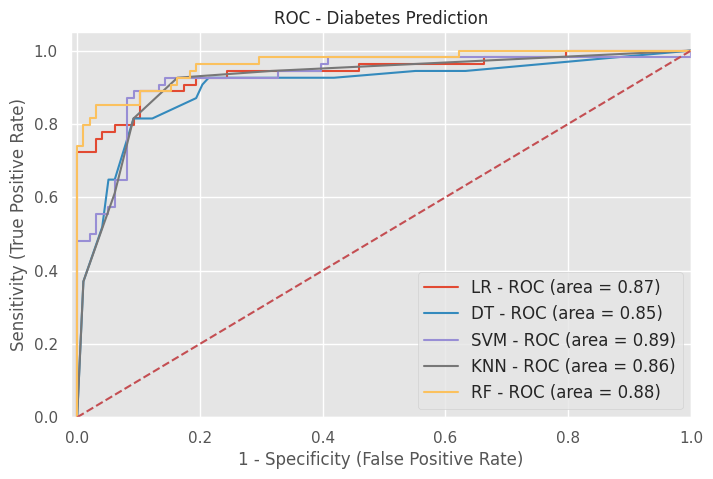

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'RF',
    'model': rand_clf,
},
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

Kodingan tersebut digunakan untuk membuat kurva ROC (Receiver Operating Characteristic) untuk setiap model klasifikasi yang diuji dalam dataset diabetes.

Mari kita jelaskan langkah-langkahnya:

1. **Import Library**: `from sklearn import metrics` digunakan untuk mengimpor modul `metrics` dari library scikit-learn, yang berisi fungsi-fungsi untuk evaluasi model.

2. **Membuat Figure**: `plt.figure(figsize=(8,5))` membuat gambar (figure) dengan ukuran 8x5 inci untuk menempatkan plot ROC.

3. **List Models**: `models` adalah sebuah list yang berisi dictionary untuk setiap model yang akan dievaluasi. Setiap dictionary memiliki dua kunci: 'label' untuk memberi label pada plot, dan 'model' untuk menyimpan objek model.

4. **Looping melalui Model**: Loop `for` digunakan untuk mengiterasi melalui setiap model dalam list `models`. Di setiap iterasi, model akan dipilih, dilatih (`fit`) menggunakan data pelatihan, dan kemudian melakukan prediksi (`predict`) pada data uji.

5. **Menghitung ROC**: Setelah model melakukan prediksi pada data uji, langkah selanjutnya adalah menghitung nilai FPR (False Positive Rate), TPR (True Positive Rate), dan threshold menggunakan fungsi `roc_curve` dari modul `metrics`. Hasilnya disimpan dalam variabel `fpr1`, `tpr1`, dan `thresholds`. Selanjutnya, nilai AUC (Area Under the Curve) dari kurva ROC dihitung menggunakan fungsi `roc_auc_score`, yang kemudian disimpan dalam variabel `auc`.

6. **Plotting ROC Curve**: Setiap kurva ROC untuk setiap model diplot menggunakan `plt.plot`. Label setiap kurva ROC mengandung nama model dan nilai AUC yang dihitung sebelumnya.

7. **Plotting Garis Referensi**: Garis referensi diagonal dari (0,0) hingga (1,1) (garis warna merah putus-putus) diplot menggunakan `plt.plot([0, 1], [0, 1],'r--')`. Ini adalah garis referensi untuk klasifikasi acak.

8. **Mengatur Batas Plot**: Batas sumbu x diatur dari -0.01 hingga 1 dan batas sumbu y diatur dari 0 hingga 1.05 menggunakan `plt.xlim([-0.01, 1.0])` dan `plt.ylim([0.0, 1.05])`.

9. **Memberi Label dan Judul**: Label sumbu x diberi nama '1 - Specificity (False Positive Rate)', label sumbu y diberi nama 'Sensitivity (True Positive Rate)', dan judul plot diberi nama 'ROC - Diabetes Prediction'.

10. **Menambahkan Legenda**: Legenda ditambahkan ke plot menggunakan `plt.legend`, dengan posisi di sudut kanan bawah.

11. **Menyimpan Plot**: Plot ROC disimpan sebagai gambar dengan format JPEG menggunakan `plt.savefig`.

12. **Menampilkan Plot**: Terakhir, plot ditampilkan menggunakan `plt.show()`.

Dengan demikian, kodingan tersebut menghasilkan plot kurva ROC untuk setiap model yang dinilai dalam prediksi diabetes. Kurva ROC adalah alat yang berguna untuk mengevaluasi performa model klasifikasi dengan membandingkan trade-off antara tingkat positif palsu (False Positive Rate) dan tingkat positif benar (True Positive Rate).

Performa yang baik dari suatu model klasifikasi diukur dengan mempertimbangkan kedua metrik tersebut: True Positive Rate (TPR) dan False Positive Rate (FPR), serta trade-off antara keduanya. Namun, penting untuk memahami bahwa tidak ada satu metrik tunggal yang dapat sepenuhnya menggambarkan kualitas model secara keseluruhan. Oleh karena itu, evaluasi model yang komprehensif harus mempertimbangkan beberapa metrik.

- **TPR yang tinggi dan FPR yang rendah**: Model yang memiliki True Positive Rate (TPR) yang tinggi dan False Positive Rate (FPR) yang rendah dianggap memiliki performa yang baik. Ini berarti model mampu mendeteksi sebagian besar kasus positif (sensitivitas tinggi) sambil meminimalkan jumlah kasus negatif yang salah diperkirakan sebagai positif (spesifisitas tinggi).

- **Kurva ROC yang mendekati sudut kiri atas**: Dalam plot kurva ROC, semakin dekat kurva ROC ke sudut kiri atas, semakin baik performa model.

- **Area Under the Curve (AUC) yang tinggi**: AUC adalah ukuran keseluruhan kualitas model. Semakin tinggi nilai AUC (dari 0 hingga 1), semakin baik performa model. Sebuah nilai AUC 1.0 menunjukkan model sempurna, sementara nilai 0.5 menunjukkan model yang tidak lebih baik daripada pengacakan.

Jadi, secara umum, performa yang baik adalah yang memiliki sensitivitas (TPR) tinggi, spesifisitas (1 - FPR) tinggi, kurva ROC yang mendekati sudut kiri atas, dan AUC yang tinggi.

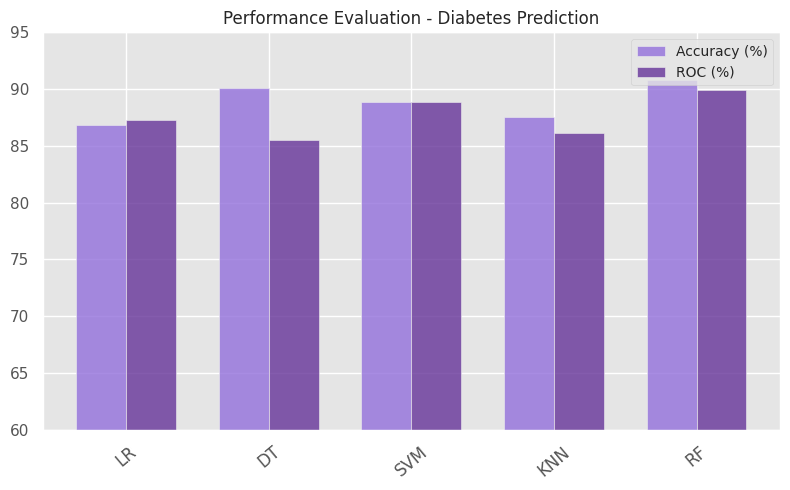

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': DT},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'RF', 'model': rand_clf},
]

means_accuracy = [100*round(log_reg_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(rand_acc,4)]
means_roc = []

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

# data to plot
n_groups = len(models)
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
                 alpha=opacity,
                 color='mediumpurple',
                 label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
                 alpha=opacity,
                 color='rebeccapurple',
                 label='ROC (%)')

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index + bar_width/2, [m['label'] for m in models], rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.ylim([60, 95])
plt.tight_layout()
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()


Kodingan tersebut digunakan untuk mengevaluasi kinerja beberapa model klasifikasi dalam memprediksi diabetes. Berikut penjelasan dari kodingan tersebut:

1. **Import Library**: Pertama, dilakukan import library yang diperlukan, yaitu `metrics` dari scikit-learn, `numpy` untuk operasi numerik, dan `matplotlib.pyplot` untuk membuat visualisasi grafis.

2. **Definisi Model**: List `models` berisi dictionary untuk setiap model klasifikasi yang ingin dievaluasi. Setiap dictionary memiliki dua kunci: 'label' untuk memberi label pada plot, dan 'model' untuk menyimpan objek model.

3. **Evaluasi Model**: Setiap model dalam list `models` dilatih menggunakan data pelatihan (`X_train` dan `y_train`). Kemudian, model melakukan prediksi pada data uji (`X_test`), dan hasilnya digunakan untuk menghitung metrik evaluasi, seperti Area Under the Curve (AUC) dari kurva ROC.

4. **Data untuk Plot**: Nilai-nilai akurasi dan AUC dari setiap model disimpan dalam list `means_accuracy` dan `means_roc` untuk digunakan dalam pembuatan plot.

5. **Membuat Plot**: Plot dibuat menggunakan matplotlib. Grafik batang menampilkan akurasi dan AUC dari setiap model. Setiap model direpresentasikan dengan label yang sesuai, dan berbagai warna digunakan untuk membedakan antara akurasi dan AUC.

6. **Menyimpan Plot**: Plot disimpan dalam format gambar JPEG menggunakan `plt.savefig` dengan nama file "PE_diabetes.jpeg".

7. **Menampilkan Plot**: Plot ditampilkan menggunakan `plt.show()`.

Kesimpulan dari kodingan tersebut adalah:

- Dengan melihat plot, Anda dapat membandingkan kinerja akurasi dan AUC dari beberapa model klasifikasi yang dievaluasi.
- Model dengan akurasi dan AUC yang lebih tinggi akan memiliki performa yang lebih baik dalam memprediksi diabetes.
- Anda dapat menggunakan informasi ini untuk memilih model terbaik yang sesuai dengan kebutuhan Anda dalam aplikasi praktis, seperti memprediksi risiko diabetes pada pasien berdasarkan fitur-fitur klinis tertentu.

# Kesimpulan
Berdasarkan grafik yang diberikan, berikut adalah kesimpulan dan saran yang dapat diambil dari hasil evaluasi beberapa model klasifikasi (Logistic Regression (LR), Decision Tree (DT), Support Vector Machine (SVM), K-Nearest Neighbors (KNN), dan Random Forest (RF)) dalam memprediksi diabetes:

### Kesimpulan

1. **Logistic Regression (LR)**:
   - **Accuracy**: Sekitar 86.84%
   - **ROC AUC**: Sekitar 87%
   - **Kesimpulan**: Logistic Regression menunjukkan performa yang baik dibawah K-Neirest neighbors

2. **Decision Tree (DT)**:
   - **Accuracy**: Sekitar 90.13%
   - **ROC AUC**: Sekitar 86%
   - **Kesimpulan**: Decision Tree memiliki performa yang lebih tinggi kedua setelah Random forest.

3. **Support Vector Machine (SVM)**:
   - **Accuracy**: Sekitar 88.82%
   - **ROC AUC**: Sekitar 88%
   - **Kesimpulan**: SVM menunjukkan performa yang lebih tinggi ketiga setelah Decision Tree.

4. **K-Nearest Neighbors (KNN)**:
   - **Accuracy**: Sekitar 87.5%
   - **ROC AUC**: Sekitar 86%
   - **Kesimpulan**: KNN menunjukkan performa yang baik mendekati Support Vector Machine

5. **Random Forest (RF)**:
   - **Accuracy**: Sekitar 90.79%
   - **ROC AUC**: Sekitar 89%
   - **Kesimpulan**: Random Forest menunjukkan performa terbaik di antara semua model dengan akurasi dan AUC yang tinggi.

### Saran

1. **Pemilihan Model**:
   - **Support Vector Machine (SVM)** dan **Random Forest (RF)** adalah pilihan terbaik berdasarkan hasil evaluasi, karena keduanya menunjukkan akurasi dan AUC yang tinggi.
   - **Logistic Regression (LR)** juga bisa dipertimbangkan sebagai alternatif yang lebih sederhana dengan performa yang hampir sebanding.

2. **Tuning Hyperparameter**:
   - Lakukan tuning hyperparameter untuk model yang dipilih (misalnya, menggunakan Grid Search atau Random Search) untuk mendapatkan performa yang lebih optimal.

3. **Validasi Lebih Lanjut**:
   - Lakukan validasi silang (cross-validation) untuk memastikan bahwa model yang dipilih tidak overfit pada data uji tertentu.
   - Pertimbangkan untuk menggunakan teknik validasi lainnya, seperti stratified k-fold cross-validation, untuk mendapatkan estimasi performa yang lebih robust.

4. **Analisis Fitur**:
   - Analisis lebih lanjut terhadap fitur yang digunakan untuk memastikan bahwa semua fitur yang relevan disertakan dan fitur yang tidak relevan atau redundan dihilangkan.
   - Pertimbangkan penggunaan teknik seleksi fitur atau dimensionality reduction (misalnya PCA) untuk meningkatkan performa model.

5. **Penggunaan Data Tambahan**:
   - Jika memungkinkan, gunakan data tambahan untuk melatih model, yang dapat membantu meningkatkan generalisasi dan performa model.

6. **Implementasi Model**:
   - Setelah memilih model yang terbaik, lakukan implementasi dan monitoring performa model di lingkungan produksi untuk memastikan bahwa model tetap berperforma baik saat digunakan dengan data nyata.